In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# What's on my plate?

As a reminder, our initial research questions are:

- What is the proportion of imported/exported products per country?
- Which countries sell the highest variety of eco-friendly products in terms of packaging and CO2 footprint?
- Which countries have the largest variety of organic-labeled products?
- What is the average nutrition score of every product category?
- What ingredients imply a better nutrition score (or vice-versa)?

From those in mind, we will analyse the dataset in order to see which features would be usefull to answer them and and most of all find if there is enough data to answer them!

# Data cleaning

### Loading the CSV file
The CSV File is stored on our computer with the name `OpenFood.csv`. From opening it with a text editor, we found out that the cells are separated by tabulations (i.e. by the `\t` character). Even though the file size is 1.8 GB, we still manage to fit it in a dataframe. We start by opening it:

In [2]:
path = ""
file_name = "OpenFood.csv"
data_path = path+file_name
df = pd.read_csv(data_path, sep = '\t')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### DataFrame Exploration

Let's first make sure we can display all the columns of the DataFrame:

In [3]:
pd.set_option("display.max_columns", 200)

In [4]:
pd.set_option("display.max_rows", 200)

We then have a look at it

In [5]:
df

code  \
0                0000000000017   
1                0000000000031   
2                0000000000123   
3                0000000000178   
4                0000000000291   
5                0000000000949   
6                0000000000970   
7                0000000001001   
8                0000000001007   
9                0000000001137   
10               0000000001151   
11               0000000001199   
12               0000000001281   
13               0000000001311   
14               0000000001328   
15               0000000001564   
16               0000000001663   
17               0000000001670   
18               0000000001885   
19               0000000002042   
20               0000000002103   
21               0000000002219   
22               0000000002257   
23               0000000002264   
24               0000000002363   
25               0000000002400   
26               0000000002417   
27               0000000003018   
28               0000000003087   
29               0000000003384   
30               0000000003780   
31               0000000003803   
32               0000000003827   
33               0000000004299   
34               0000000004510   
35               0000000004530   
36               0000000004559   
37               0000000004565   
38               0000000004572   
39               0000000004732   
40               0000000004794   
41               0000000005005   
42               0000000005081   
43               0000000005166   
44               0000000005241   
45               0000000005272   
46               0000000005388   
47               0000000005470   
48               0000000005500   
49               0000000005661   
50               0000000007009   
51               0000000007160   
52               0000000008204   
53               0000000009317   
54               0000000010900   
55               0000000011631   
56               0000000011686   
57               0000000012812   
58               0000000014120   
59               0000000014250   
60               0000000014281   
61               0000000014595   
62               0000000015707   
63               0000000015769   
64               0000000016087   
65               0000000016094   
66               0000000016100   
67               0000000016117   
68               0000000016124   
69               0000000016193   
70               0000000016513   
71               0000000016612   
72               0000000016650   
73               0000000016872   
74               0000000016933   
75               0000000017497   
76                000000001772   
77               0000000018012   
78               0000000018050   
79               0000000018173   
80               0000000018197   
81               0000000018227   
82               0000000018265   
83               0000000018289   
84               0000000018319   
85               0000000018340   
86               0000000018357   
87               0000000018371   
88               0000000018388   
89               0000000018395   
90               0000000018401   
91               0000000018418   
92               0000000018449   
93               0000000018456   
94               0000000018500   
95               0000000018517   
96               0000000018524   
97               0000000018555   
98               0000000018562   
99               0000000018579   
...                        ...   
699024           9900000007157   
699025           9900000009113   
699026           9900005010886   
699027           9900010011557   
699028           9900010015098   
699029           9900010015104   
699030           9900010048850   
699031           9900010048867   
699032  9900014423142000990001   
699033  9900162792162001950001   
699034                99003333   
699035           9900560000001   
699036           9901198001583   
699037           9901886011829   
699038           9901886011836   
699039           9901942000794   
699040        

With this first look at the DataFrame we can immediately remove the following columns as they are useless for our research purposes:

In [9]:
columns_to_drop = [
    'url',
    'creator',
    'created_t',
    'created_datetime',
    'last_modified_t',
    'last_modified_datetime',
    'generic_name',
    'quantity',
    'emb_codes',
    'emb_codes_tags',
    'purchase_places',
    'stores',
    'traces',
    'traces_tags',
    'serving_size',
    'no_nutriments',
    'image_url',
    'allergens', 
    'image_small_url',
    'manufacturing_places_tags',
    'image_ingredients_url',
    'image_ingredients_small_url',
    'image_nutrition_url',
    'image_nutrition_small_url',
    'states',        
    'states_en',
    'states_tags',
    'serving_quantity',
    'traces_en',
    'allergens_en',
    'ingredients_that_may_be_from_palm_oil',
    'ingredients_from_palm_oil'
]

In [32]:
# Drop the colums and put the result in a new data frame
df2 = df.drop(columns_to_drop, axis=1)

It is hard to get an idea of what the values are as there are loads of NaN Values... To get a better idea of the values from the dataframe, we show the unique values of each columns:

In [125]:
# We create a new dataframe
df_unique = pd.DataFrame()

# For each column
for col in df2.columns:
    # We take only the unique values of every column
    df_unique = pd.concat([df_unique, pd.Series(df2[col].unique())], ignore_index=True, axis=1, copy=False)
df_unique.columns= df2.columns

In [126]:
df_unique.head(100)

code                                  product_name  \
0   0000000000017                              Vitória crackers   
1   0000000000031                                         Cacao   
2   0000000000123                         Sauce Sweety chili 0%   
3   0000000000178                                     Mini coco   
4   0000000000291                                     Mendiants   
5   0000000000949                     Salade de carottes râpées   
6   0000000000970                   Fromage blanc aux myrtilles   
7   0000000001001                                           NaN   
8   0000000001007                                      Vainilla   
9   0000000001137                             Baguette parisien   
10  0000000001151                 &quot;Baguette Lyonnais&quot;   
11  0000000001199                        Solène céréales poulet   
12  0000000001281                            Tarte noix de coco   
13  0000000001311                    Salade de fruits exotiques   
14  0000000001328                              Chouquettes x 30   
15  0000000001564                           Fromage blanc pêche   
16  0000000001663                        Crème dessert chocolat   
17  0000000001670                          Bouillie de sarrasin   
18  0000000001885                              Compote de poire   
19  0000000002042                              Paëlla de poulet   
20  0000000002103                        Aiguillettes de poulet   
21  0000000002219                            Salade shaker chef   
22  0000000002257                Salade de macedoine de légumes   
23  0000000002264                             Baguette Poitevin   
24  0000000002363                                  Suedois thon   
25  0000000002400                               Ciabatta Bombay   
26  0000000002417                                 Ciabatta Roma   
27  0000000003018                                 Salade tomate   
28  0000000003087                            Farine de blé noir   
29  0000000003384                       Mousse chocolat douceur   
30  0000000003780                             Coca des flandres   
31  0000000003803                              Brochettes dinde   
32  0000000003827                                Suedois saumon   
33  0000000004299                               Crêpes au Kamok   
34  0000000004510                         Salade shaker taboulé   
35  0000000004530                Banana Chips Sweetened (Whole)   
36  0000000004559                                       Peanuts   
37  0000000004565                    Sandwich classique fromage   
38  0000000004572                                 Pain epeautre   
39  0000000004732             Sandiwch Tradition Complet Jambon   
40  0000000004794            Fromage blanc à la creme de marron   
41  0000000005005                                     Abondance   
42  0000000005081                                  Salade verte   
43  0000000005166         cuisse de poulet direct au four curry   
44  0000000005241                                         Bagel   
45  0000000005272             Sandwich solene céréales sicilien   
46  0000000005388                         Brioché poulet caesar   
47  0000000005470                              BAguette bressan   
48  0000000005500                               Baguette Niçois   
49  0000000005661              Pavé de saumon fumé à la ficelle   
50  0000000007009                          Torti au saumon fumé   
51  0000000007160                                   CORNED BEEF   
52  0000000008204                     Mediterranean Pasta Salad   
53  0000000009317                    Salade fusili poulet curry   
54  0000000010900                           Pasta box carbonara   
55  0000000011631                  Pasta box jambon champignion   
56  0000000011686                                Tarte chocolat   
57  0000000012812                   Salade fraîcheur 3 fromages   
58  0000000014120                       Salade fraicheur cae

As we saw that there is a large number of NaN values we also show the number of non NaN values of each column along with the number of different values in each of the columns:

In [127]:
# We initialize the columns to be used in the table that will be shown
cols = ['Number of non NaN values per column', 'Number of different values in each columns']

# We create a table to show the informations
describe_df = pd.DataFrame([df2.count(),df_unique.count()]).transpose()
describe_df.columns = cols
describe_df['ColNumber'] = np.arange(df_unique.shape[1])
describe_df

Number of non NaN values per column  \
code                                                                     699090   
product_name                                                             672964   
packaging                                                                140857   
packaging_tags                                                           140854   
brands                                                                   464919   
brands_tags                                                              464886   
categories                                                               180674   
categories_tags                                                          180673   
categories_en                                                            180639   
origins                                                                   42706   
origins_tags                                                              42652   
manufacturing_places                                                      67573   
labels                                                                   102248   
labels_tags                                                              102281   
labels_en                                                                102281   
first_packaging_code_geo                                                  27893   
cities                                                                        0   
cities_tags                                                               29735   
countries                                                                698529   
countries_tags                                                           698529   
countries_en                                                             698529   
ingredients_text                                                         394428   
additives_n                                                              394394   
additives                                                                394380   
additives_tags                                                           212051   
additives_en                                                             212018   
ingredients_from_palm_oil_n                                              394394   
ingredients_from_palm_oil_tags                                            12002   
ingredients_that_may_be_from_palm_oil_n                                  394394   
ingredients_that_may_be_from_palm_oil_tags                                22850   
nutrition_grade_uk                                                            0   
nutrition_grade_fr                                                       141680   
pnns_groups_1                                                            257713   
pnns_groups_2                                                            263667   
main_category                                                            180562   
main_category_en                                                         180562   
energy_100g                                                              596006   
energy-from-fat_100g                                                        912   
fat_100g                                                                 590631   
saturated-fat_100g                                                       564706   
-butyric-acid_100g                                                            1   
-caproic-acid_100g                                                            1   
-caprylic-acid_100g                                                           3   
-capric-acid_100g                                                             3   
-lauric-acid_100g                                                             7   
-myristic-acid_100g                                                           2   
-palmitic-acid_100g                                                           2   
-stearic-acid_100g                                          

After further looking into the dataset, we see that there are some columns that are redundant such as `packaging` and `packaging_tags` so we keep only one of the two. For this specific example we only keep the `packaging_tags` column as the values are easier to deal with. We also remove some other columns. The reasons for the removal are stated as comment in the cell below:

In [128]:
columns_to_drop_2 = [
    'packaging', # The values are redundant and be used in packaging_tags
    'brands', # brands_tags has more stable (same rows are represented in different ways) values
    'categories', # categories_tags has more stable values
    'categories_en', # categories_tags has more stable values
    'origins', # origins_tags has more stable values
    'labels', # labels_tags has more stable values
    'labels_en', # labels_tags has more stable values
    'first_packaging_code_geo', # Not interesting for our research questions
    'cities', # Contains only NaN values and not really intresting for our research questions
    'cities_tags', # Contains only NaN values and not really intresting for our research questions
    'countries', # Seem to contain useless duplicated values (France, en:FR, en:france,...)
    'countries_en', # The countries_tags column gives a more stable result
    'ingredients_text', # too hard to deal with and not really intresting after seeing the values
    'additives', # Not needed for our research question, only the number of additives can be interesting
    'additives_en', # Not needed for our research question, only the number of additives can be interesting
    'ingredients_that_may_be_from_palm_oil_n', # As we already keep ingredients_from_palm_oil_n
    'ingredients_that_may_be_from_palm_oil_tags', # As we already keep ingredients_from_palm_oil_n
    'nutrition_grade_uk', # Contains only NaN values
    'main_category_en', # The main_category column has more stable values
]

Now for the nutrition facts we can delete all the columns that have less than 1000 values (count) because if they do, it means that the columns are too specific (like type of sugar) or there aren't enough values in the dataset in the columns to be interessting. Note this means we have to drop the idea of analyzing the carbon footprint as there aren't enough values to answer our carbon foot print analysis

In [159]:
# Creating the list of all the all the food fact column to delete
describe_df_aux = describe_df.iloc[36:]
food_facts_to_drop = list(describe_df_aux[describe_df_aux['Number of non NaN values per column'] < 1000].index.values)

Now that we have the two lists we can merge them and then drop the columns:

In [188]:
# Merging the two list created above
columns_to_drop_merged = columns_to_drop_2 + food_facts_to_drop
# Deleting and storing in a new dataframe
df3 = df2.drop(columns_to_drop_merged, axis = 1)

Now we can wonder if the `code` column can be set as the index:

In [185]:
df3.code.is_unique

False

So the code column is not unique let's see how many values are duplicated:

In [162]:
# We take all the rows where the code is duplicates
duplicate_codes_indices = np.where(df3.duplicated('code', keep=False).values)[0]
dups = df3.iloc[duplicate_codes_indices].copy()
dups.code = dups.code.astype(float)

# We sort so that the duplicated rows are on top of each other
dups.sort_values(by = 'code', inplace = True)

# Show the result
dups

code                                       product_name  \
66475   5.000000e+01                                Boisson instantanée   
535902  5.000000e+01                                                NaN   
596588  7.340000e+02                                                NaN   
167953  7.340000e+02  Enjoy Life Chewy Bars, Soy free, Nut free, Glu...   
10873   1.160220e+05  British marrowfat processed peas in water - su...   
209616  1.160220e+05                       British Giant Marrowfat Peas   
148839  6.356460e+05                Chargrilled Vegetable & Basil Pesto   
75132   6.356460e+05                                M&S Vegetable Pizza   
75134   6.356840e+05                                 6 Wholemeal Pittas   
148845  6.356840e+05  Wholemeal Pittas Enriched with Extra Virgin Ol...   
165192  7.228100e+05     Sea Salt & Balsamic Vinegar hand cooked Crisps   
89530   7.228100e+05     Sea Salt & balsamic Vinegar Hand Cooked crisps   
188264  8.379960e+05    Vegetable Pasta Bake with Broccoli & Petit Pois   
112326  8.379960e+05    Vegetable pasta bake with broccoli & petit pois   
205342  8.887070e+05                                  Christmas Pudding   
117435  8.887070e+05                                  Christmas Pudding   
207921  8.984780e+05                            Sandwich Œuf et Cresson   
118000  8.984780e+05                    Œuf et Cresson sur Pain Spécial   
141754  3.318233e+06                               Bicarbonate de soude   
362674  3.318233e+06                               Bicarbonate de soude   
142651  4.159932e+06                 Dijon Mustard Made With Chardonnay   
520415  4.159932e+06                            French's Dijon mustard    
209301  1.111082e+10                        Italian style bread crumbs    
4306    1.111082e+10                                       Bread Crumbs   
210444  1.356200e+10               Cheddar Bunnies Baked Snack Crackers   
12141   1.356200e+10                     Cheddar Bunnies Snack Crackers   
210445  1.356200e+10                           Cheddar Squares Crackers   
12142   1.356200e+10              Baked Snack Crackers, Cheddar Squares   
12535   1.410007e+10                            Milano Double Chocolate   
210625  1.410007e+10                                          Palm oil    
210626  1.410010e+10  Soft Baked Chocolate Chunk Dark Chocolate Brow...   
12583   1.410010e+10   Soft Baked Chocolate Chunk Dark Chocolat Brownie   
14511   1.600019e+10                                     Fruit Roll Ups   
211137  1.600019e+10                                     Fruit roll-ups   
14609   1.600044e+10                            nature valley trial mix   
211138  1.600044e+10                                                NaN   
15067   1.630017e+10                       Orange Pineapple Juice Blend   
211249  1.630017e+10                      Juice Blend, Orange Pineapple   
15653   1.740014e+10                                  Brown & Wild Rice   
211487  1.740014e+10          Minute, Ready To Serve! Brown & Wild Rice   
211768  1.889400e+10                            Raisins, Nut & Seed Mix   
16334   1.889400e+10                     Raisins, Nut & Seed Mix Snacks   
234918  2.219801e+10                              Sparkling Apple Juice   
21795   2.219801e+10                           Mayer Bros, Juice, Apple   
381504  3.377610e+10                            Coconut & Peanut Spread   
32323   3.377610e+10                            Coconut & Peanut Spread   
387834  3.400011e+10                                     Reese's Pieces   
32603   3.400011e+10             Reese's Pieces Au Beurre De Cacahuètes   
406866  3.485603e+10                       Welch's Island Fruits Snacks   
33287   3.485603e+10                       Welch's Island Fruits Snacks   
417723  3.549301e+10  High Liner, Sea Cuisine, Salmon, Applewood Smoked   
33604   3.549301e+10                            Applewood Smoked Salmon   
417724  3.549301e+10         High Liner, 

As it can be seen there are two types of duplicates:
Some codes (`code` column) appear twice and some codes are NaN. As it can be observed when codes are duplicated, they are often the same product and sometimes one of the rows contains more information than the other for the same code. So we could just keep the rows that contain the most information. And for the rows with NaN as code, the values of the columns are not matching the column names so there must be a shift of values. As a lot of values are missing, it would be complex to recover the true data and there are only 34 rows with code equal to NaN, so we can delete them:

In [163]:
dups = dups[dups != float('nan')]

dups['nb_of_features'] = np.sum(dups.notnull(), axis=1)
dups.reset_index(inplace = True)
indices_to_remove = dups.sort_values(['code','nb_of_features'],ascending = True)\
                        .groupby('code',as_index=False).first()['index'].values
df3.dropna(subset=['code'],inplace=True)
df3.drop(indices_to_remove,inplace = True)

We verify that the `code` column of the dataframe is unique:

In [164]:
df3.code.is_unique

True

So we just have to set this column as the index:

In [165]:
df3.set_index('code', inplace = True)

We further remark that the `nutrition-score-fr_100g` and `nutrition-score-uk_100g` columns are at the end of the dataframe. So we'll just do a reordering to put them next to the `nutrition_grade_fr` for better readability:

In [189]:
# Creating the ordered index list
l1 = list(range(13))
l2 = [56,57]
l3 = list(range(13,57))
ordered_col_indices = l1+l2+l3
len(ordered_col_indices)
df3 = df3[df3.columns[ordered_col_indices]]
df3

code  \
0                0000000000017   
1                0000000000031   
2                0000000000123   
3                0000000000178   
4                0000000000291   
5                0000000000949   
6                0000000000970   
7                0000000001001   
8                0000000001007   
9                0000000001137   
10               0000000001151   
11               0000000001199   
12               0000000001281   
13               0000000001311   
14               0000000001328   
15               0000000001564   
16               0000000001663   
17               0000000001670   
18               0000000001885   
19               0000000002042   
20               0000000002103   
21               0000000002219   
22               0000000002257   
23               0000000002264   
24               0000000002363   
25               0000000002400   
26               0000000002417   
27               0000000003018   
28               0000000003087   
29               0000000003384   
30               0000000003780   
31               0000000003803   
32               0000000003827   
33               0000000004299   
34               0000000004510   
35               0000000004530   
36               0000000004559   
37               0000000004565   
38               0000000004572   
39               0000000004732   
40               0000000004794   
41               0000000005005   
42               0000000005081   
43               0000000005166   
44               0000000005241   
45               0000000005272   
46               0000000005388   
47               0000000005470   
48               0000000005500   
49               0000000005661   
50               0000000007009   
51               0000000007160   
52               0000000008204   
53               0000000009317   
54               0000000010900   
55               0000000011631   
56               0000000011686   
57               0000000012812   
58               0000000014120   
59               0000000014250   
60               0000000014281   
61               0000000014595   
62               0000000015707   
63               0000000015769   
64               0000000016087   
65               0000000016094   
66               0000000016100   
67               0000000016117   
68               0000000016124   
69               0000000016193   
70               0000000016513   
71               0000000016612   
72               0000000016650   
73               0000000016872   
74               0000000016933   
75               0000000017497   
76                000000001772   
77               0000000018012   
78               0000000018050   
79               0000000018173   
80               0000000018197   
81               0000000018227   
82               0000000018265   
83               0000000018289   
84               0000000018319   
85               0000000018340   
86               0000000018357   
87               0000000018371   
88               0000000018388   
89               0000000018395   
90               0000000018401   
91               0000000018418   
92               0000000018449   
93               0000000018456   
94               0000000018500   
95               0000000018517   
96               0000000018524   
97               0000000018555   
98               0000000018562   
99               0000000018579   
...                        ...   
699024           9900000007157   
699025           9900000009113   
699026           9900005010886   
699027           9900010011557   
699028           9900010015098   
699029           9900010015104   
699030           9900010048850   
699031           9900010048867   
699032  9900014423142000990001   
699033  9900162792162001950001   
699034                99003333   
699035           9900560000001   
699036           9901198001583   
699037           9901886011829   
699038           9901886011836   
699039           9901942000794   
699040        

The resulting data frame after removing the features and lines we don't need for our questions is:

And the dataframe has the following shape:

In [137]:
print('{0}(row) x {1}(columns)'.format(df3.shape[0], df3.shape[1]))

698939(row) x 56(columns)


So we are using these proportions of the initial dataframe:

In [138]:
print('{0:1.2f}% of the rows of the initial dataframe'.format(df3.shape[0]/df.shape[0]*100))
print('{0:1.2f}% of the rows of the initial dataframe'.format(df3.shape[1]/df.shape[1]*100))

99.97% of the rows of the initial dataframe
32.37% of the rows of the initial dataframe


### Types and statistics of the features

Let's first check what are the type of the columns of the dataframe:

In [139]:
df3.dtypes

product_name                             object
packaging_tags                           object
brands_tags                              object
categories_tags                          object
origins_tags                             object
manufacturing_places                     object
labels_tags                              object
countries_tags                           object
additives_n                             float64
additives_tags                           object
ingredients_from_palm_oil_n             float64
ingredients_from_palm_oil_tags           object
cocoa_100g                              float64
nutrition-score-fr_100g                 float64
nutrition_grade_fr                       object
pnns_groups_1                            object
pnns_groups_2                            object
main_category                            object
energy_100g                             float64
fat_100g                                float64
saturated-fat_100g                      

Here the types are object as there are a lot of NaN values (which are float type) in the text so the python compiler can put string as type. We will be able to replace some of the NaN values later.

Let's plot the percentage of the non NaN values in each general information features i.e. column 0 to 19. The data set is split with respect to some groups of columns to have make a better representation of each category of feature:

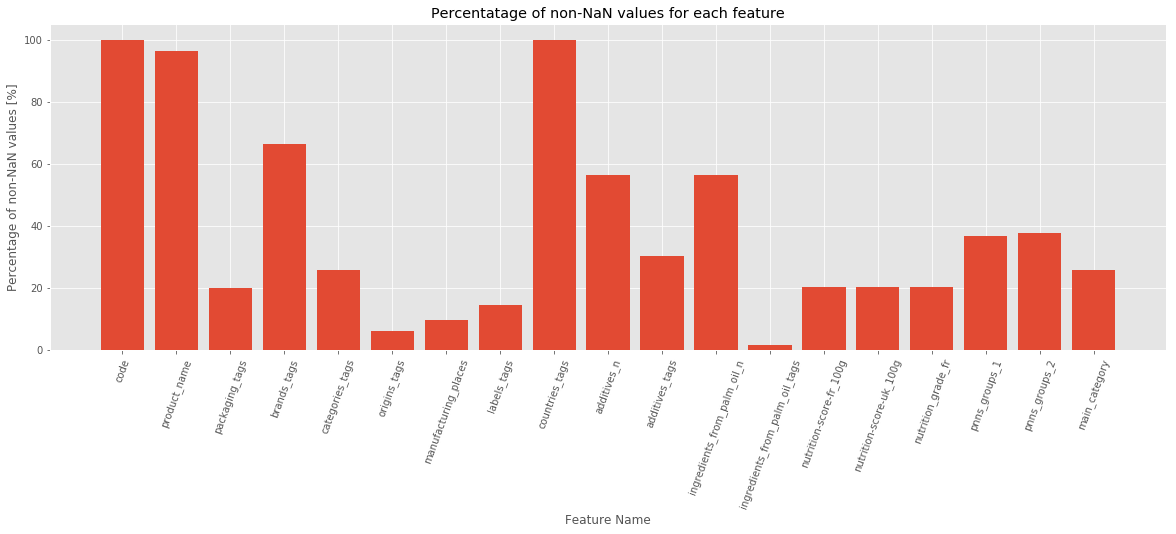

In [196]:
general_info = df3.iloc[:,:19]
plt.figure(figsize=(20,6))
plt.bar(range(general_info.shape[1]),general_info.count()/general_info.shape[0]*100)
plt.xticks(range(general_info.shape[1]), general_info.columns,rotation=70)
plt.title("Percentatage of non-NaN values for each feature")
plt.xlabel("Feature Name")
plt.ylabel("Percentage of non-NaN values [%]")
plt.show()

As expected from looking at the data frame, there is a large number of NaN values. Indeed, for the `origin_tags` there is more than 95% of the values that are NaN values. This is compromising a lot with our research question about import/export. On the other hand, from the `df_unique` dataframe we see that there is still ~50'000 rows that contain an origin tags so we will still be able to do some research (though not as extended as we wished) on a subset of rows.

We also plot an histogram of the count of non-NaN values for each row:

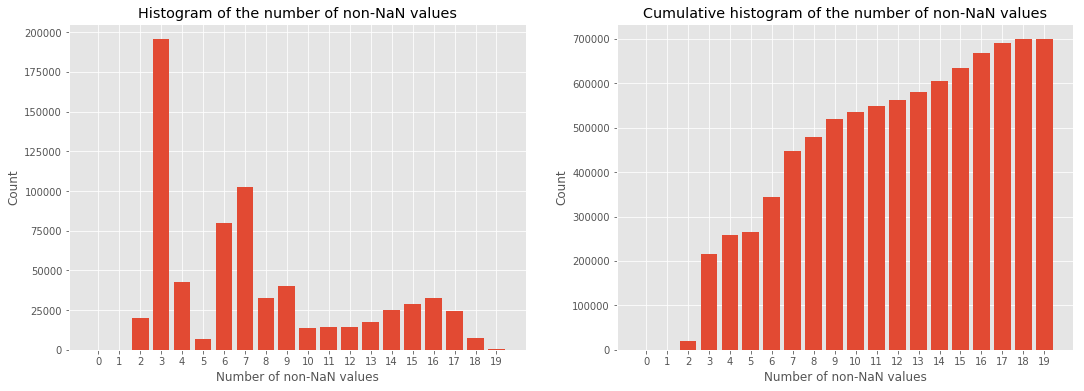

In [197]:
# Plotting 
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(general_info.transpose().count(),
         bins = np.arange(general_info.shape[1]+2)-0.5,
         rwidth = 0.8)
plt.xticks(range(general_info.shape[1]+1))
plt.title("Histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")

plt.subplot(122)
plt.hist(general_info.transpose().count(),
         bins = np.arange(general_info.shape[1]+2)-0.5, 
         cumulative=True,
         rwidth = 0.8)
plt.xticks(range(general_info.shape[1]+1))
plt.title("Cumulative histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")
plt.show()

By seeing the problem row-wise, we can evaluate the amount of data that we will be able to use. We can see the distribution on the left to get a general idea of the number of non-NaN values for each row. But the most interesting plot is the cumulative on the right. We can see that more than 150'000 rows have more than 9 non-NaN values. So we will still be able to play with a lot of data eventhough we will have to drop loads of rows. We still have to figure out what threshold. This is depending on what specific aspect is studied!

Now we need to plot the percentages of non-NaN values for the nutritional part of the data frame:

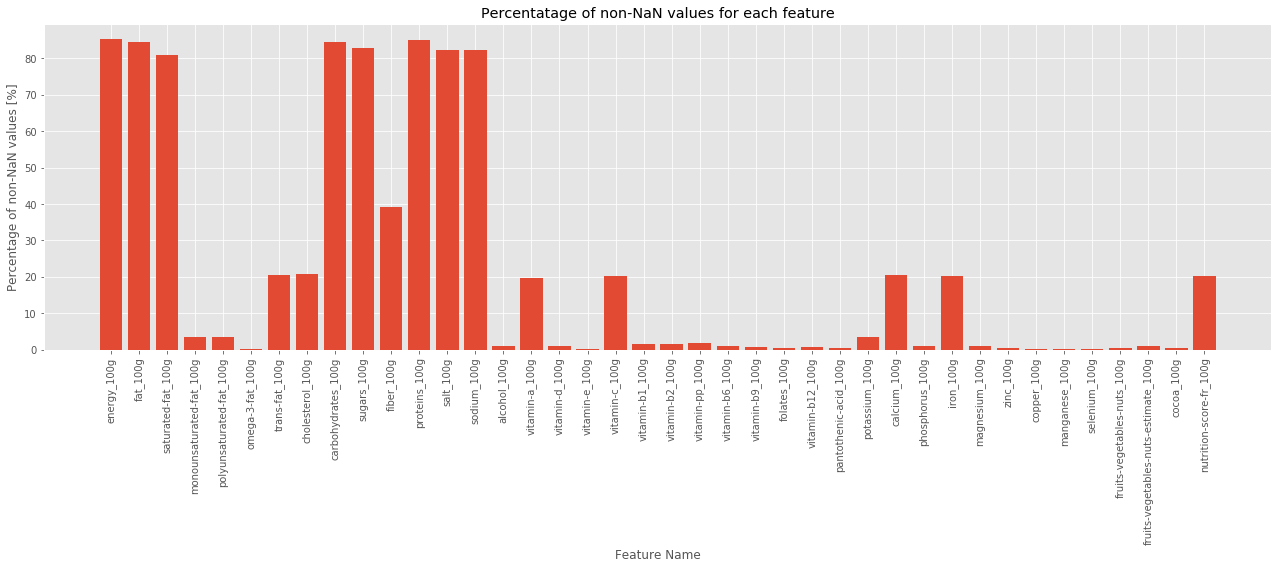

In [199]:
# Plotting 
nutritional_info = df3.iloc[:,19:]
plt.figure(figsize=(22,6))
plt.bar(range(nutritional_info.shape[1]),nutritional_info.count()/nutritional_info.shape[0]*100)
plt.xticks(range(nutritional_info.shape[1]), nutritional_info.columns,rotation=90)
plt.title("Percentatage of non-NaN values for each feature")
plt.xlabel("Feature Name")
plt.ylabel("Percentage of non-NaN values [%]")
plt.show()

For the nutrition values, we clearly have either a very few NaN values (e.g. `energy_100g`, `fat_100g`, `saturated_fat_100g`, etc) or almost only NaN values (e.g. `omega-3_fat_100g`, `monounsaturated-fat_100g`, `polyunsaturated-fat_100g`, etc). But for nutrition data, all the NaN values doesn't necessarily mean that the value is unknown, so once again dependending on the studied case, we will be able to consider some NaN values equal to 0 (or close to 0)!

And we also plot the histograms of the non-NaN values of the nutriments part:

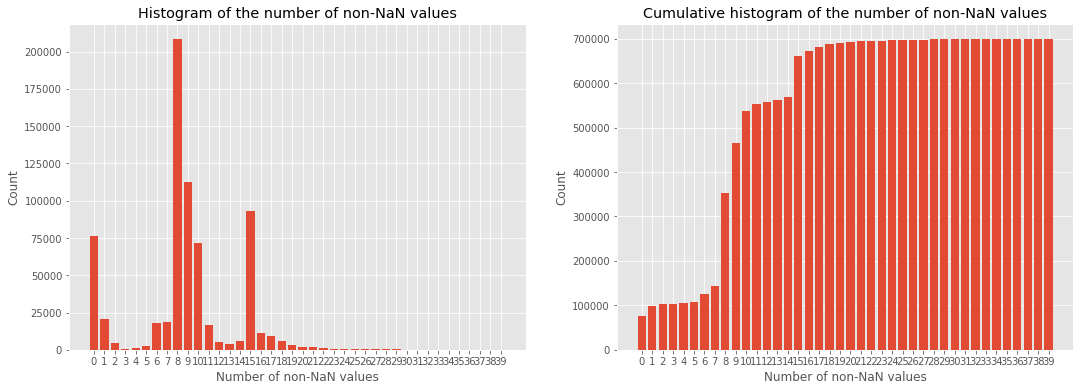

In [143]:
# Plotting
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(nutritional_info.transpose().count(),
         bins = np.arange(nutritional_info.shape[1]+2)-0.5,
         rwidth = 0.8)
plt.xticks(range(nutritional_info.shape[1]+1))
plt.title("Histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")

plt.subplot(122)
plt.hist(nutritional_info.transpose().count(),
         bins = np.arange(nutritional_info.shape[1]+2)-0.5, 
         cumulative=True,
         rwidth = 0.8)
plt.xticks(range(nutritional_info.shape[1]+1))
plt.title("Cumulative histogram of the number of non-NaN values")
plt.xlabel("Number of non-NaN values")
plt.ylabel("Count")
plt.show()

From these histograms, we notice that more than 500'000 rows contain at least 7 non-NaN features (which must be one of the 8 most important features that we see above) and ~150000 contain at least 14 non-NaN features which is already a lot.

# More analysis of the research questions

### What is the proportion of imported/exported products per country?

With both `origins_tags` and `countries_tags`, we can extract the countries that import and export the most number of products. We can assume that the name of the product are unique and therefore can be used to look for the number of products sold in or are being sold by a particular country. The countries and origins tags are not cleaned yet, but it is definitely possible to search whether it might countain the name of a known country or the abbreviation of it to do or from one of its cities. We also plan to extract the known coordinate for every country and map them to the origins_tags and countries_tags and display the flow of products inward or outward from every single country and its volume on a world map to know what country produces the most of the products used worldwide or the one that imports the most of its products. With the second data frame we imported, we will be able to show the distance traveled by the product (using the great distant circle) in the world.

In [173]:
# The number of unique values for origins_tags
len(df3["origins_tags"].unique())

6715

In [174]:
# The number of unique values for countries
len(df3["countries_tags"].unique())

1246

In [71]:
# Number of products sold in a specific country
df3.copy().groupby(by = ['countries_tags'])["product_name"].count()

countries_tags
ch:schweiz                                                                                                                                                                                                                                                                                                             2
ch:suisse                                                                                                                                                                                                                                                                                                             76
de:allemagne                                                                                                                                                                                                                                                                                                          17
de:frankrike,de:sverige,de:tyskland           

In [72]:
# Number of products made in a specific country
df3.copy().groupby(by = ['origins_tags'])["product_name"].count()


origins_tags
03-2018                                                                                                                                                                                                                                                1
08430-jandun,france                                                                                                                                                                                                                                    1
0se361-3,sweden                                                                                                                                                                                                                                        1
1-france,3-ue                                                                                                                                                                                                                                   

We notice that the aggregation by `countries_tags` has 6681 possible unique values (excluding NaN) which is much more than the possible number of countries in the world. After exploring the countries_tags, we observe the some products are sold in more than a single country, and the combination of all the product in which it is sold is considered a single entry for `origins_tags`. Thus, a seperation of the `countries_tags` is neccessary and reaggregation of the all the products.

We also notice that origins_tags has 1237 unique values (excluding NaN) whici is more than the possible number of countries in the world. After exploring origins_tags, we observe the some origin_tags are more specific about the origins than just including the country. We should clean this column by looking at whether it contains a known name of a country.

### Which countries sell the highest variety of eco-friendly products in terms of packaging and CO2 footprint?

As explained earlier, the column `carbon-footprint_100g` has less than 1000 values. This jeopardizes this research question on one hand since CO2 footprint is a vital aspect and the data is lacking. As a result, we will not be using the CO2 footprint in this research question since we have decided to remove the column. On the other hand, we will be able to move forward by analyzing the `packaging_tags` column. <br>
Let's see if the `packaging_tags` and `countries_tags` column have enough data for this question:

In [147]:
df3['packaging_tags'].count()

140833

In [148]:
df3['countries_tags'].count()

698344

We notice that the data relative to the packaging has more than 140,000 non-NaN values and the data relative to the country where is it ***sold*** is present in nearly all products. In this sense, by using the information of the packaging along with the column `countries_tags`, we can estimate the countries that sell the highest variety of eco-friendly products but only in terms of packaging

### Which countries have the largest variety of organic-labeled products? 

This research question appeals to three different columns: `countries_tags`, `categories_tags` and `labels_tags`. The labels and categories have data about wether the products are organic or not, while the countries will be used to identify which of the countries have the largest variety of organic-labeled products.

In [60]:
df['categories_tags'].count()

180673

We see that we have data of the categories for more than 180,000 products. As a result, this column has enough data to be considered for this research question.

In [68]:
df['labels_tags'].count()

102281

We also notice that we have data of the labels for more than 100,000 products. As a result, this column has enough data to be considered for this research question. <br>
Since we know that the `countries_tags` column is filled for almost every product, we can conclude that this research question can be answered by looking at the organic labels in `labels_tags` and possibly `categories_tags` and mapping the labels to the countries from `countries_tags`.

### What is the average nutrition score of every product category? 

In order to answer this research question, we will be diving into the `nutrition-score-fr_100g`, `nutrition-score-uk_100g` as well as some columns about the categories: `categories_tags`, `main_category`, `pnns_groups_1` and `pnns_groups_2`. Since we have already seen the number of non-NaN values for `categories_tags` above, we can now analyze the other columns that can be very helpful for this research question 

In [84]:
df3['nutrition-score-fr_100g'].count()

141680

In [88]:
df3['nutrition-score-uk_100g'].count()

141680

We notice that `nutrition-score-uk_100g` and `nutrition-score-fr_100g` have the exact same number of the non-NaN values. We can check how similar they are columns.

In [90]:
df3['nutrition-score-uk_100g'].corr(df3['nutrition-score-fr_100g'])

0.9310561453786349

The two columns are 93% similar. We can then move on with only one of the columns since they are nearly exactly the same. <br> Let's analyze further the columns related to the product category.

In [94]:
print(df3['main_category'].count())
print(df3['pnns_groups_1'].count())
print(df3['pnns_groups_2'].count())

180562
257713
263667


We notice that for every column that is related to the category of the product, we do indeed have enough data (at least 180,000 products). By mapping the categories to the nutrition score, we can find out the average nutrition score for every category.

### What ingredients imply a better nutrition score (or vice-versa)?

We have seen that we do not only have ingredients, but also the energy level (`energy_100g`), the amount of sugar and so on. Hence, this question can be asked in a more general manner: ***What nutrition-related features imply a better nutrition score (or vice-versa)?***
In order to answer this research question, we will dive into the nutrition score (which we analyzed above) and the nutrition-related features that we have in our final data frame. The final data frame has a total of 39 nutrition-related features (starting from `energy_100g` and all the subsequent columns) that have data for at least 1,000 products. <br>
By analyzing the correlation between those nutrition-related features and the nutrition score, we can see which ingredients seem to improve or lower the nutrition score. <br>
Moreover, we have decided to dive deeper into the research of this question by applying machine learning techniques to answer the following question: ***Given the product and assuming that the ingredients are known, can we predict the nutrition score?*** By determining which nutrition-related features imply a better nutrition score, we can then apply a classification technique such as logistic regression to predict what would be the nutrition score for the given product.